### IMPORTS

In [57]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
SAVE_PATH = "../saves/"

In [60]:
def get_pareto_old(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [ ]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            # Compare the current element with all other elements using broadcasting
            is_dominated = np.all(arr_np[i] <= arr_np, axis=1) & np.any(arr_np[i] < arr_np, axis=1)
            # Update the mask to mark dominated elements as False
            is_pareto_efficient[is_dominated] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient

### Visualization

In [61]:
print(os.listdir(SAVE_PATH))
savefile = os.listdir(SAVE_PATH)[-1]
"Visualizing data from: " + savefile

['pareto.csv', 'saves_1710502540563.csv', 'saves_1710502616293.csv', 'saves_1710502702203.csv', 'saves_1710502795933.csv', 'saves_1710513923401.csv', 'saves_1710514182799.csv', 'saves_1710514219897.csv', 'saves_1710514418808.csv', 'saves_1710514601277.csv', 'saves_1710514689193.csv', 'saves_1710514832352.csv', 'saves_1710515003559.csv', 'saves_1710515295123.csv', 'saves_1710515637176.csv']


'Visualizing data from: saves_1710515637176.csv'

In [62]:
# Read CSV
contracts = pd.read_csv(SAVE_PATH+savefile, sep=';')
contracts.drop_duplicates(inplace=True)
print(contracts.shape)
contracts.head()

(26550, 4)


,utilA,utilB,utilSum,contract
0,1815,7407,9222,"[185,127,129,70,19,87,121,178,111,132,130,84,7..."
1,1840,7364,9204,"[34,127,129,70,49,87,121,178,111,132,130,84,77..."
2,1863,7322,9185,"[34,127,129,70,19,87,121,178,102,132,130,84,77..."
3,1831,7396,9227,"[34,127,129,70,19,87,121,178,111,132,130,84,77..."
4,1840,7336,9176,"[34,127,129,70,19,87,121,178,111,132,130,84,77..."


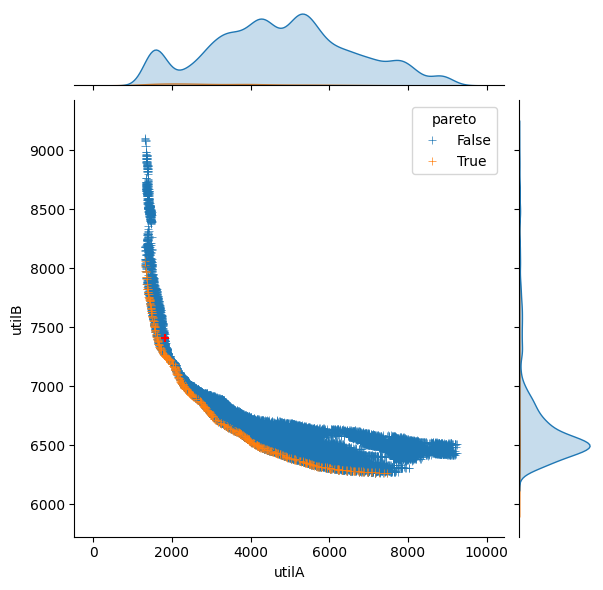

In [66]:
if "pareto" in contracts.columns:
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue="pareto", marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red', marker="+")
else:
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue=contracts.index, marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red')

In [67]:
# Determine pareto-efficient contracts if necessary
if "pareto" not in contracts.columns:
    contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
    contracts = contracts.drop_duplicates()
    contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
contracts

,utilA,utilB,utilSum,contract,pareto
0,1815,7407,9222,"[185,127,129,70,19,87,121,178,111,132,130,84,7...",False
1,1840,7364,9204,"[34,127,129,70,49,87,121,178,111,132,130,84,77...",False
2,1863,7322,9185,"[34,127,129,70,19,87,121,178,102,132,130,84,77...",False
3,1831,7396,9227,"[34,127,129,70,19,87,121,178,111,132,130,84,77...",False
4,1840,7336,9176,"[34,127,129,70,19,87,121,178,111,132,130,84,77...",False
...,...,...,...,...,...
26545,3964,6541,10505,"[198,29,90,41,187,79,179,47,26,161,115,152,131...",True
26546,4504,6454,10958,"[198,29,90,41,187,60,179,47,26,161,115,152,163...",True
26547,4469,6457,10926,"[198,29,90,41,187,60,179,47,26,161,115,152,163...",False
26548,4418,6463,10881,"[198,29,90,41,187,60,179,47,26,161,115,152,163...",True
